### Import required libraries

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re

### Data sources

#### Contractor data analysis<a href="#contractor-analysis"></a>
Data on claims from community pharmacies for Pharmacy First clinical pathways is published by NHS BSA within the [Pharmacy and appliance contractor dispensing data](https://www.nhsbsa.nhs.uk/prescription-data/dispensing-data/dispensing-contractors-data) - from Feb 24 onwards the dataset contain columns for each clinical condition e.g. "NumberofPharmacyFirstClinicalPathwaysConsultations-AcuteOtitisMedia" which contains a count for each community pharmacy.

#### Medication supply data analysis
Data on medications supplied under a Pharmacy First clinical pathway is published by NHS BSA within the [Prescription Cost Analysis (PCA) dataset](https://opendata.nhsbsa.net/dataset/prescription-cost-analysis-pca-monthly-data) - from Feb 24 onwards the PCA dataset contains a column "PHARMACY_ADVANCED_SERVICE" which contains a value 'Pharmacy First Clinical Pathways' where medication was supplied under the Pharmacy First service.

In [8]:
# Read the CSV file into a DataFrame
contractor_df = pd.read_csv("../data/contractor_data.csv")

# Normalise column names to remove gaps around hyphen (NumberofPharmacyFirstClinicalPathwaysConsultations -AcuteSoreThroat column name has an additional space) 
contractor_df.columns = contractor_df.columns.str.replace(r'\s*-\s*', '-', regex=True)

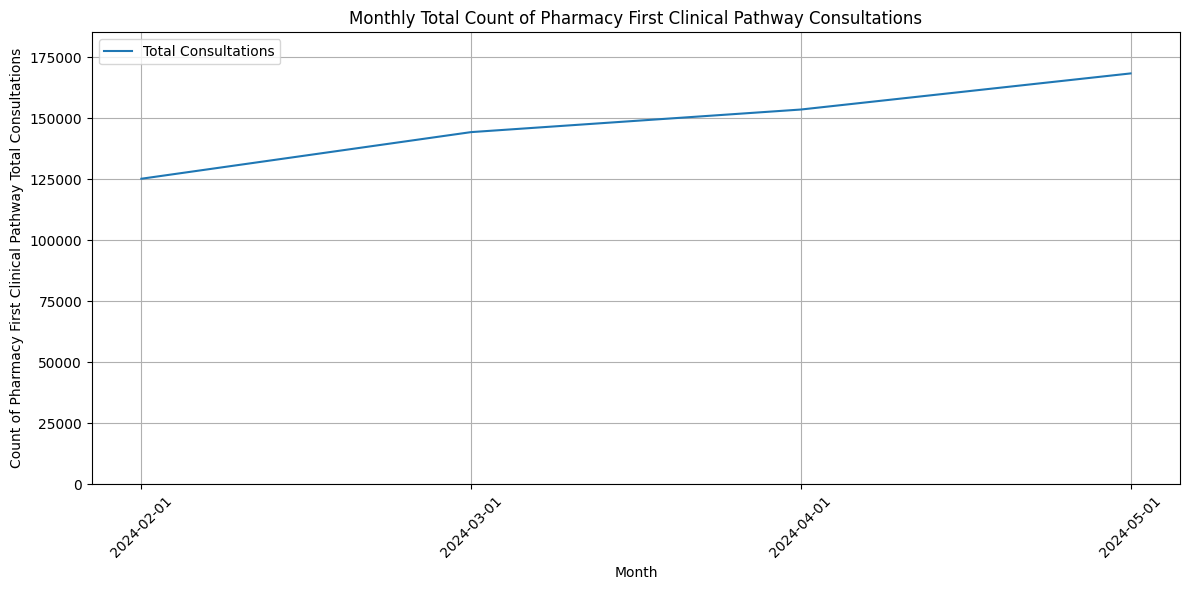

,month,NumberofPharmacyFirstClinicalPathwaysConsultations-Total
0,2024-02-01,125275
1,2024-03-01,144389
2,2024-04-01,153646
3,2024-05-01,168447


In [20]:
plot_total_consultations(contractor_df_national)
contractor_df_national[["month", "NumberofPharmacyFirstClinicalPathwaysConsultations-Total"]]

In [21]:
items_per_month_df

,YEAR_MONTH,PF_MEDICATION_ITEMS
0,2024-02-01,94435
1,2024-03-01,113407
2,2024-04-01,121531
3,2024-05-01,135257
4,2024-06-01,132487


In [22]:
items_per_consult = pd.merge(items_per_month_df, contractor_df_national[["month", "NumberofPharmacyFirstClinicalPathwaysConsultations-Total"]], left_on="YEAR_MONTH", right_on="month")
items_per_consult=items_per_consult[["month", "PF_MEDICATION_ITEMS", "NumberofPharmacyFirstClinicalPathwaysConsultations-Total"]]
items_per_consult["items_per_consult"]=items_per_consult["PF_MEDICATION_ITEMS"]/items_per_consult["NumberofPharmacyFirstClinicalPathwaysConsultations-Total"]
items_per_consult

,month,PF_MEDICATION_ITEMS,NumberofPharmacyFirstClinicalPathwaysConsultations-Total,items_per_consult
0,2024-02-01,94435,125275,0.753822
1,2024-03-01,113407,144389,0.785427
2,2024-04-01,121531,153646,0.790981
3,2024-05-01,135257,168447,0.802965


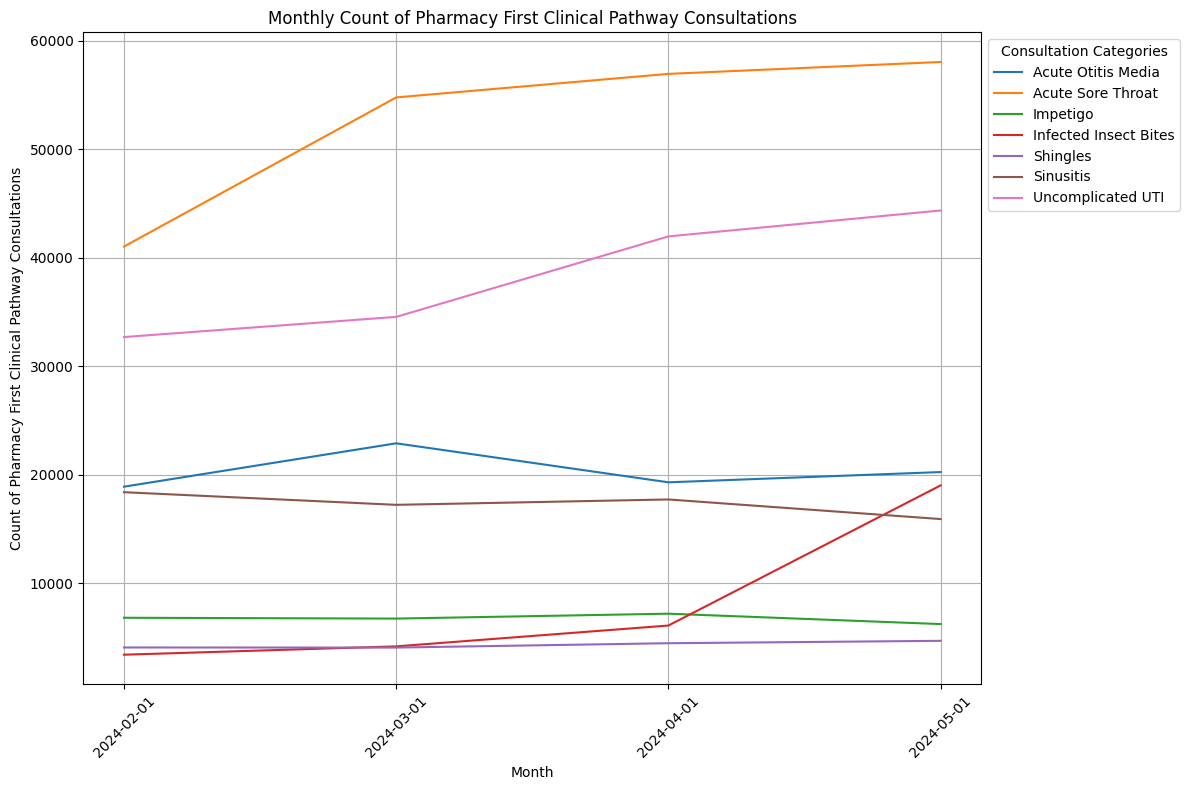

,month,NumberofPharmacyFirstClinicalPathwaysConsultations-AcuteOtitisMedia,NumberofPharmacyFirstClinicalPathwaysConsultations-AcuteSoreThroat,NumberofPharmacyFirstClinicalPathwaysConsultations-Impetigo,NumberofPharmacyFirstClinicalPathwaysConsultations-InfectedInsectBites,NumberofPharmacyFirstClinicalPathwaysConsultations-Shingles,NumberofPharmacyFirstClinicalPathwaysConsultations-Sinusitis,NumberofPharmacyFirstClinicalPathwaysConsultations-UncomplicatedUTI
0,2024-02-01,18893,41014,6816,3412,4078,18384,32678
1,2024-03-01,22888,54756,6740,4180,4069,17220,34536
2,2024-04-01,19295,56925,7191,6099,4470,17715,41951
3,2024-05-01,20240,58022,6235,19010,4691,15909,44340


In [23]:
plot_line_chart(contractor_df_national)
contractor_df_national[["month", "NumberofPharmacyFirstClinicalPathwaysConsultations-AcuteOtitisMedia", "NumberofPharmacyFirstClinicalPathwaysConsultations-AcuteSoreThroat", "NumberofPharmacyFirstClinicalPathwaysConsultations-Impetigo", "NumberofPharmacyFirstClinicalPathwaysConsultations-InfectedInsectBites", "NumberofPharmacyFirstClinicalPathwaysConsultations-Shingles", "NumberofPharmacyFirstClinicalPathwaysConsultations-Sinusitis", "NumberofPharmacyFirstClinicalPathwaysConsultations-UncomplicatedUTI"]]

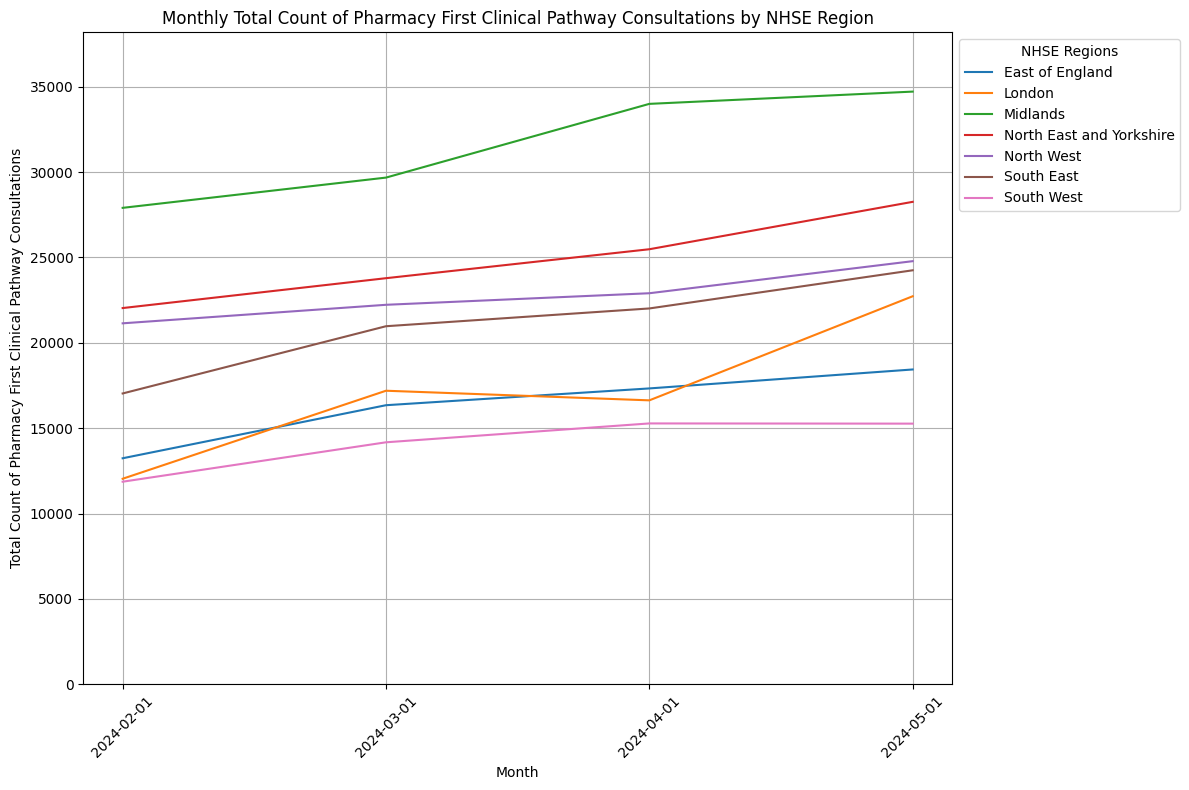

,month,NHSER22NM,NumberofPharmacyFirstClinicalPathwaysConsultations-Total
0,2024-02-01,North West,5999
1,2024-03-01,North West,6380
2,2024-04-01,North West,6365
3,2024-05-01,North West,6561
4,2024-02-01,North East and Yorkshire,2707
...,...,...,...
163,2024-05-01,South East,2287
164,2024-02-01,North West,8006
165,2024-03-01,North West,8084
166,2024-04-01,North West,8389


In [24]:
plot_total_consultations_by_region(contractor_df_regional)
contractor_df_regional[["month", "NHSER22NM", "NumberofPharmacyFirstClinicalPathwaysConsultations-Total"]]

In [ ]:
plot_bp_consultation()


In [ ]:
plot_contraception_consultation()

In [25]:
def plot_line_chart(df, x_column='month'):
    """
    Plots a line chart for each consultation category from a DataFrame.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column to use for the x-axis (default is 'month').
    """
    # Dynamically select columns that start with the desired prefix
    prefix = 'NumberofPharmacyFirstClinicalPathwaysConsultations-'
    consultation_columns = [col for col in df.columns if col.startswith(prefix) and col != 'NumberofPharmacyFirstClinicalPathwaysConsultations-Total']
    
    # Function to add spaces before capital letters, except within sequences of capitals
    def add_spaces(label):
        # Insert space before a capital letter that is not preceded by another capital letter
        return re.sub(r'(?<!^)(?<![A-Z])(?=[A-Z])', ' ', label)

    # Create a dictionary to map full column names to clean labels with spaces
    clean_labels = {col: add_spaces(col.replace(prefix, '').strip()) for col in consultation_columns}
    
    plt.figure(figsize=(12, 8))
    
    for column in consultation_columns:
        plt.plot(df[x_column], df[column], label=clean_labels[column])
    
    plt.xlabel('Month')
    plt.ylabel('Count of Pharmacy First Clinical Pathway Consultations')
    plt.title('Monthly Count of Pharmacy First Clinical Pathway Consultations')
    plt.legend(title='Consultation Categories', loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_total_consultations(df, x_column='month', y_column='NumberofPharmacyFirstClinicalPathwaysConsultations-Total'):
    """
    Plots a line chart for the total consultations over time from a DataFrame.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column to use for the x-axis (default is 'month').
        y_column (str): The name of the column to plot on the y-axis (default is 'NumberofPharmacyFirstClinicalPathwaysConsultations-Total').
    """
    plt.figure(figsize=(12, 6))
    
    # Plot the total consultations over time
    plt.plot(df[x_column], df[y_column], label='Total Consultations', color='tab:blue')

    # Set y-axis to start at 0
    plt.ylim(0, df[y_column].max() * 1.1)  # Extend upper limit slightly for visual padding

    plt.xlabel('Month')
    plt.ylabel('Count of Pharmacy First Clinical Pathway Total Consultations')
    plt.title('Monthly Total Count of Pharmacy First Clinical Pathway Consultations')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

def plot_total_consultations_by_region(df, region_column='NHSER22NM', x_column='month', y_column='NumberofPharmacyFirstClinicalPathwaysConsultations-Total'):
    """
    Plots a line chart for the total consultations over time for each region category from a DataFrame.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        region_column (str): The name of the column representing the region categories.
        x_column (str): The name of the column to use for the x-axis (default is 'month').
        y_column (str): The name of the column to plot on the y-axis (default is 'NumberofPharmacyFirstClinicalPathwaysConsultations-Total').
    """
    plt.figure(figsize=(12, 8))
    
    # Group the DataFrame by 'region_column' and 'x_column'
    grouped_df = df.groupby([region_column, x_column])[y_column].sum().reset_index()
    
    # Get unique Region categories
    region_categories = grouped_df[region_column].unique()
    
    # Plot each Region category
    for region in region_categories:
        region_data = grouped_df[grouped_df[region_column] == region]
        plt.plot(region_data[x_column], region_data[y_column], label=region)
    
    # Set y-axis to start at 0
    plt.ylim(0, grouped_df[y_column].max() * 1.1)  # Extend upper limit slightly for visual padding

    plt.xlabel('Month')
    plt.ylabel('Total Count of Pharmacy First Clinical Pathway Consultations')
    plt.title('Monthly Total Count of Pharmacy First Clinical Pathway Consultations by NHSE Region')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(title='NHSE Regions', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

In [26]:
# Keep only the specified columns
columns_to_keep = [
    'ICBCode', 'ICB', 'TotalnumberofPrescriptions(ProfessionalFees)', 'NumberofMedicineUseReviews(MURs)declared',
    'NumberofNewMedicineService(NMS)interventionsdeclared', 'NumberofCommunityPharmacistConsultationService(CPCS)Fees',
    'NumberofCommunityPharmacyClinicBloodPressurechecks', 'NumberofCommunityPharmacyAmbulatoryBloodPressureMonitoring(ABPM)',
    'NumberofCommunityPharmacyContraceptiveOngoingConsultations', 'NumberofCommunityPharmacyContraceptiveInitiationConsultations',
    'NumberofPharmacyFirstClinicalPathwaysConsultations-AcuteOtitisMedia', 'NumberofPharmacyFirstClinicalPathwaysConsultations-AcuteSoreThroat',
    'NumberofPharmacyFirstClinicalPathwaysConsultations-Impetigo', 'NumberofPharmacyFirstClinicalPathwaysConsultations-InfectedInsectBites',
    'NumberofPharmacyFirstClinicalPathwaysConsultations-Shingles', 'NumberofPharmacyFirstClinicalPathwaysConsultations-Sinusitis',
    'NumberofPharmacyFirstClinicalPathwaysConsultations-UncomplicatedUTI', 'NumberofPharmacyFirstUrgentMedicineSupplyConsultations',
    'NumberofPharmacyFirstMinorIllnessReferralConsultations', 'month'
]

contractor_df = contractor_df[columns_to_keep]

contractor_contraception_df = contractor_df[['month', 'ICBCode', 'ICB', 'NumberofCommunityPharmacyContraceptiveInitiationConsultations', 'NumberofCommunityPharmacyContraceptiveOngoingConsultations']]
contractor_contraception_df['Contraception'] = contractor_contraception_df['NumberofCommunityPharmacyContraceptiveInitiationConsultations'] + contractor_contraception_df['NumberofCommunityPharmacyContraceptiveOngoingConsultations']
contractor_contraception_df = contractor_contraception_df[['month', 'ICBCode', 'ICB', 'Contraception']]
# Group by 'ICBCode', 'ICB', and 'month', then sum the other columns
contractor_contraception_df = contractor_contraception_df.groupby(['ICBCode', 'ICB', 'month']).sum().reset_index()


contractor_bp_df = contractor_df[['month', 'ICBCode', 'ICB', 'NumberofCommunityPharmacyClinicBloodPressurechecks', 'NumberofCommunityPharmacyAmbulatoryBloodPressureMonitoring(ABPM)']]
contractor_bp_df['BP'] = contractor_bp_df['NumberofCommunityPharmacyClinicBloodPressurechecks'] + contractor_bp_df['NumberofCommunityPharmacyAmbulatoryBloodPressureMonitoring(ABPM)']
contractor_bp_df = contractor_bp_df[['month', 'ICBCode', 'ICB', 'BP']]
# Group by 'ICBCode', 'ICB', and 'month', then sum the other columns
contractor_bp_df = contractor_bp_df.groupby(['ICBCode', 'ICB', 'month']).sum().reset_index()


# Filter columns that start with 'NumberofPharmacyFirstClinicalPathwaysConsultations'
columns_to_sum = contractor_df.filter(regex='^NumberofPharmacyFirstClinicalPathwaysConsultations').columns

# Create the new column by summing the selected columns row-wise
contractor_df['NumberofPharmacyFirstClinicalPathwaysConsultations-Total'] = contractor_df[columns_to_sum].sum(axis=1)

# Drop the 'ICBCode' and 'ICB' columns to get national view
contractor_df_national = contractor_df.drop(columns=['ICBCode', 'ICB'])

# Group by 'month' and sum the remaining columns
contractor_df_national = contractor_df_national.groupby(['month']).sum().reset_index()

# Group by 'ICBCode', 'ICB', and 'month', then sum the other columns
contractor_df_icb = contractor_df.groupby(['ICBCode', 'ICB', 'month']).sum().reset_index()

icb_to_region_df = pd.read_csv("../data/Sub_ICB_Locations_to_Integrated_Care_Boards_to_NHS_England_(Region)_(July_2022)_Lookup_in_England.csv")

# Keep only the specified columns
icb_to_region_df = icb_to_region_df[['ICB22CDH', 'NHSER22CDH', 'NHSER22NM']]

# Remove duplicates
icb_to_region_df = icb_to_region_df.drop_duplicates()

contractor_df_icb = contractor_df_icb.merge(icb_to_region_df, left_on='ICBCode', right_on='ICB22CDH', how='left')

# Drop the 'ICBCode' and 'ICB' columns to get national view
contractor_df_regional = contractor_df_icb.drop(columns=['ICBCode', 'ICB', 'ICB22CDH'])

/tmp/ipykernel_21/2942515909.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contractor_contraception_df['Contraception'] = contractor_contraception_df['NumberofCommunityPharmacyContraceptiveInitiationConsultations'] + contractor_contraception_df['NumberofCommunityPharmacyContraceptiveOngoingConsultations']
/tmp/ipykernel_21/2942515909.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contractor_bp_df['BP'] = contractor_bp_df['NumberofCommunityPharmacyClinicBloodPressurechecks'] + contractor_bp_df['

In [16]:
# Define the relative path to the CSV file
relative_path = "../data/pca_data.csv"

# Get the absolute path
absolute_path = os.path.abspath(relative_path)

# Read the CSV file into a DataFrame
pca_df = pd.read_csv(absolute_path) 

# Convert YEAR_MONTH from YYYYMM to a string and then to datetime, setting day as 01
pca_df['YEAR_MONTH'] = pd.to_datetime(pca_df['YEAR_MONTH'].astype(str) + '01', format='%Y%m%d')

# Format the datetime object to YYYY-MM-DD
pca_df['YEAR_MONTH'] = pca_df['YEAR_MONTH'].dt.strftime('%Y-%m-%d')

In [17]:
#PF Items per month
items_per_month_df = pca_df.groupby('YEAR_MONTH')['ITEMS'].sum().reset_index()

# Rename the ITEMS column to PF_MEDICATION_ITEMS
items_per_month_df.rename(columns={'ITEMS': 'PF_MEDICATION_ITEMS'}, inplace=True)


In [18]:
#Split by BNF_CHEMICAL_SUBSTANCE
chem_substance = pca_df[["BNF_CHEMICAL_SUBSTANCE", "ITEMS"]]
# Summing the ITEMS column, grouping by BNF_CHEMICAL_SUBSTANCE
grouped_sum = chem_substance.groupby("BNF_CHEMICAL_SUBSTANCE")["ITEMS"].sum().reset_index()
grouped_sum_desc = grouped_sum.sort_values(by="ITEMS", ascending=False).reset_index(drop=True)
grouped_sum_desc

,BNF_CHEMICAL_SUBSTANCE,ITEMS
0,Phenoxymethylpenicillin (Penicillin V),201781
1,Nitrofurantoin,166974
2,Flucloxacillin sodium,50954
3,Amoxicillin,39465
4,Clarithromycin,31250
5,Phenazone/lidocaine,23529
6,Mometasone furoate,22018
7,Aciclovir,18328
8,Fusidic acid,16819
9,Fluticasone furoate,10104


In [19]:
#Split by GENERIC_BNF_EQUIVALENT_NAME
generic_bnf_name = pca_df[["GENERIC_BNF_EQUIVALENT_NAME", "ITEMS"]]
# Summing the ITEMS column, grouping by GENERIC_BNF_EQUIVALENT_NAME
grouped_sum = generic_bnf_name.groupby("GENERIC_BNF_EQUIVALENT_NAME")["ITEMS"].sum().reset_index()
grouped_sum_desc = grouped_sum.sort_values(by="ITEMS", ascending=False).reset_index(drop=True)
grouped_sum_desc

,GENERIC_BNF_EQUIVALENT_NAME,ITEMS
0,Phenoxymethylpenicillin 250mg tablets,167137
1,Nitrofurantoin 100mg modified-release capsules,164792
2,Flucloxacillin 500mg capsules,43683
3,Clarithromycin 500mg tablets,25573
4,Phenazone 40mg/g / Lidocaine 10mg/g ear drops,23529
5,Mometasone 50micrograms/dose nasal spray,22018
6,Phenoxymethylpenicillin 250mg/5ml oral solution,20936
7,Amoxicillin 250mg/5ml oral suspension,20837
8,Fusidic acid 2% cream,16819
9,Aciclovir 800mg tablets,12519
